# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import numpy as np
from collections import deque
import torch
import pickle

from unityagents import UnityEnvironment
from agent import Agent
from train import main
from utils import plot_scores
from hyperparams import *

In [2]:
STATE_SIZE = 24
ACTION_SIZE = 2

In [3]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
agent = Agent(state_size=STATE_SIZE, action_size=ACTION_SIZE)

In [5]:
EPISODES = 1e4
PRINT_EVERY = 100

In [6]:
scores = []
scores_window = deque(maxlen=100)

for ep in range(1, int(EPISODES) + 1):
    agent.reset(env)
    game_end = False
    
    while not game_end:
        agent.step(env, add_noise=True)
        game_end = any(agent.dones)
    
    scores.append(np.max(agent.scores))
    scores_window.append(np.max(agent.scores))
    
    if ep % PRINT_EVERY == 0:
        print('Episode %d, average score: %.2f' % (ep, np.mean(scores_window)))

    if np.mean(scores_window) >= 0.5:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ep - 100,
                                                                                      np.mean(scores_window)))
        torch.save(agent.actor.state_dict(), 'checkpoints/tennis_actor_checkpoint.pth')
        torch.save(agent.critic.state_dict(), 'checkpoints/tennis_critic_checkpoint.pth')

C:\Miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100, average score: 0.00
Episode 200, average score: 0.00
Episode 300, average score: 0.00
Episode 400, average score: 0.00
Episode 500, average score: 0.00
Episode 600, average score: 0.00
Episode 700, average score: 0.00
Episode 800, average score: 0.00
Episode 900, average score: 0.01
Episode 1000, average score: 0.05
Episode 1100, average score: 0.09
Episode 1200, average score: 0.17
Episode 1300, average score: 0.20
Episode 1400, average score: 0.21
Episode 1500, average score: 0.27

Environment solved in 1476 episodes!	Average Score: 0.50

Environment solved in 1477 episodes!	Average Score: 0.51

Environment solved in 1478 episodes!	Average Score: 0.51

Environment solved in 1479 episodes!	Average Score: 0.51

Environment solved in 1480 episodes!	Average Score: 0.50

Environment solved in 1481 episodes!	Average Score: 0.50

Environment solved in 1486 episodes!	Average Score: 0.51

Environment solved in 1487 episodes!	Average Score: 0.51

Environment solved in 1488 episode

KeyboardInterrupt: 

#### * Terminated the training process early since the environment is already solved and the agent has stablized.

In [16]:
agent.scores

array([0.60000001, 0.70000001])

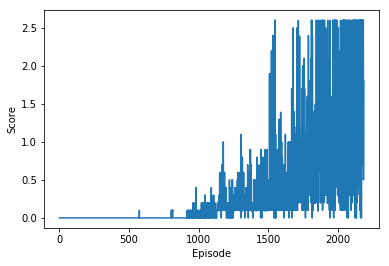

In [7]:
plot_scores(scores)

In [ ]:
env.close()

### Test Agent

In [ ]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis")

In [4]:
test_agent = Agent(state_size=STATE_SIZE, action_size=ACTION_SIZE)

In [5]:
test_agent.actor.load_state_dict(torch.load('checkpoints/tennis_actor_checkpoint.pth'))
test_agent.critic.load_state_dict(torch.load('checkpoints/tennis_critic_checkpoint.pth'))

In [8]:
TEST_EPISODES = 100

In [9]:
test_scores_window = deque(maxlen=100)

for ep in range(1, int(TEST_EPISODES) + 1):
    test_agent.reset(env)
    game_end = False
    
    while not game_end:
        test_agent.act(add_noise=True)
        env_info = env.step(test_agent.actions)[test_agent.brain_name]
        test_agent.next_states = env_info.vector_observations
        test_agent.rewards = env_info.rewards
        test_agent.dones = env_info.local_done

        test_agent.states = test_agent.next_states
        test_agent.scores += test_agent.rewards
        test_agent.step_count += 1
        game_end = any(test_agent.dones)
    
    test_scores_window.append(np.max(test_agent.scores))
    
    print('Episode %d, score: %.2f' % (ep, np.mean(test_scores_window)))

Episode 1, average score: 0.40
Episode 2, average score: 0.55
Episode 3, average score: 1.23
Episode 4, average score: 1.60
Episode 5, average score: 1.80
Episode 6, average score: 1.63
Episode 7, average score: 1.57
Episode 8, average score: 1.39
Episode 9, average score: 1.36
Episode 10, average score: 1.41
Episode 11, average score: 1.52
Episode 12, average score: 1.39
Episode 13, average score: 1.48
Episode 14, average score: 1.48
Episode 15, average score: 1.41
Episode 16, average score: 1.41
Episode 17, average score: 1.43
Episode 18, average score: 1.35
Episode 19, average score: 1.29
Episode 20, average score: 1.25
Episode 21, average score: 1.32
Episode 22, average score: 1.29
Episode 23, average score: 1.34
Episode 24, average score: 1.39
Episode 25, average score: 1.40
Episode 26, average score: 1.43
Episode 27, average score: 1.42
Episode 28, average score: 1.44
Episode 29, average score: 1.48
Episode 30, average score: 1.43
Episode 31, average score: 1.47
Episode 32, avera

In [12]:
print('Average score %.2f' % np.mean(test_scores_window))

Average score 1.55


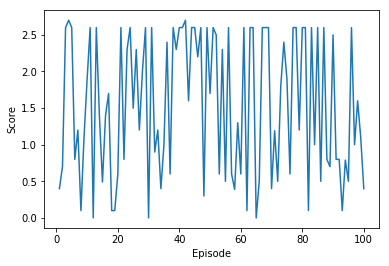

In [10]:
plot_scores(test_scores_window, 'Test_Agent')

In [13]:
env.close()

----